In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [54]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "C:/Users/91942/Desktop/JigarT10/Image Classification/Classification Fruits/train",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "C:/Users/91942/Desktop/JigarT10/Image Classification/Classification Fruits/val",
    labels='inferred',
    label_mode = 'int',sparse_categorical_crossentropy
    batch_size=16,
    image_size=(256,256)
)

Found 220 files belonging to 3 classes.
Found 55 files belonging to 3 classes.


In [38]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [64]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax')) # using softmax activation for multiclass classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # using sparse_categorical_crossentropy, (not-categorical_crossentropy) for multiclass classification


In [186]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_42 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_43 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                     

In [66]:
history = model.fit(train_ds,epochs=50,validation_data=validation_ds)

Epoch 1/50
14/14 [==============================] - 23s 1s/step - loss: 8.1649 - accuracy: 0.6545 - val_loss: 9.1872 - val_accuracy: 0.6000
Epoch 2/50
14/14 [==============================] - 23s 2s/step - loss: 3.5852 - accuracy: 0.8455 - val_loss: 15.1621 - val_accuracy: 0.6364
Epoch 3/50
14/14 [==============================] - 23s 2s/step - loss: 3.0550 - accuracy: 0.9045 - val_loss: 3.6210 - val_accuracy: 0.8000
Epoch 4/50
14/14 [==============================] - 24s 2s/step - loss: 1.8053 - accuracy: 0.9318 - val_loss: 4.4191 - val_accuracy: 0.9455
Epoch 5/50
14/14 [==============================] - 24s 2s/step - loss: 1.9352 - accuracy: 0.9364 - val_loss: 13.7539 - val_accuracy: 0.6909
Epoch 6/50
14/14 [==============================] - 25s 2s/step - loss: 1.1444 - accuracy: 0.9409 - val_loss: 10.6442 - val_accuracy: 0.6000
Epoch 7/50
14/14 [==============================] - 26s 2s/step - loss: 0.7103 - accuracy: 0.9500 - val_loss: 5.0426 - val_accuracy: 0.8182
Epoch 8/50
14/14 

In [30]:
history = model.fit(train_ds, validation_ds, epochs=50, batch_size=16)

ValueError: `y` argument is not supported when using dataset as input.

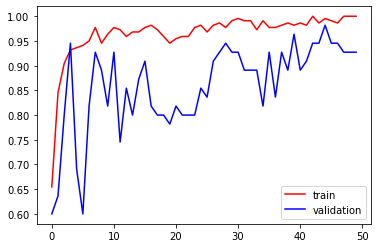

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

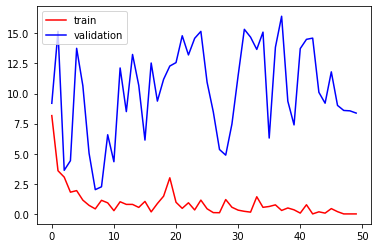

In [68]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

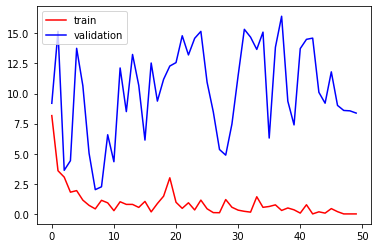

In [69]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [70]:
# model.save('cls_3_fruits.h5')
# model = keras.models.load_model('cls_3_fruits.h5')

In [76]:
import numpy as np
from PIL import Image


# load the image as a PIL Image object
img = Image.open('C:/Users/91942/Downloads/download (2).jfif')

# preprocess the image
img = img.resize((256, 256))  # resize the image to match the input size of the model
img = np.array(img) / 255.0  # convert the image to a numpy array and normalize its pixel values

# add a batch dimension to the input data
img = np.expand_dims(img, axis=0)

# use the model to make a prediction on the input data
results = model.predict(img)

# print the predicted probabilities for each class
print(results)


1/1 [==============================] - 0s 50ms/step
[[1. 0. 0.]]


In [116]:
img = Image.open("C:/Users\91942\Downloads\istock-172463274.jpg")


img = img.resize((256, 256))  # resize the image to match the input size of the model
# img = np.array(img) / 255.0  # convert the image to a numpy array and normalize its pixel values

img = np.expand_dims(img, axis=0)

model.predict(img)

1/1 [==============================] - 0s 63ms/step


array([[0., 0., 1.]], dtype=float32)

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "C:/Users/91942/Desktop/JigarT10/Image Classification/Classification Fruits/train",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "C:/Users/91942/Desktop/JigarT10/Image Classification/Classification Fruits/val",
    labels='inferred',
    label_mode = 'int',sparse_categorical_crossentropy
    batch_size=16,
    image_size=(256,256)
)

In [121]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "C:/Users/91942/Desktop/JigarT10/Image Classification/Classification Fruits/train",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "C:/Users/91942/Desktop/JigarT10/Image Classification/Classification Fruits/val",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax')) # using softmax activation for multiclass classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # using sparse_categorical_crossentropy, categorical_crossentropy for multiclass classification

history = model.fit(train_ds, epochs=10, validation_data=validation_ds, batch_size=2)

Found 220 files belonging to 3 classes.
Found 55 files belonging to 3 classes.
Epoch 1/10
14/14 [==============================] - 27s 2s/step - loss: 8.5669 - accuracy: 0.6909 - val_loss: 1.4585 - val_accuracy: 0.5818
Epoch 2/10
14/14 [==============================] - 24s 2s/step - loss: 6.4284 - accuracy: 0.8955 - val_loss: 12.7494 - val_accuracy: 0.3455
Epoch 3/10
14/14 [==============================] - 23s 2s/step - loss: 6.8174 - accuracy: 0.8455 - val_loss: 35.8431 - val_accuracy: 0.3273
Epoch 4/10
14/14 [==============================] - 23s 2s/step - loss: 5.0330 - accuracy: 0.9000 - val_loss: 56.3157 - val_accuracy: 0.3273
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 5.0282 - accuracy: 0.8909 - val_loss: 39.2271 - val_accuracy: 0.3273
Epoch 6/10
14/14 [==============================] - 23s 2s/step - loss: 2.2950 - accuracy: 0.9545 - val_loss: 90.6707 - val_accuracy: 0.3273
Epoch 7/10
14/14 [==============================] - 24s 2s/step - loss: 0.79

In [122]:
model.save('cls_3_fruits_v2.h5')


In [123]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_42 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_43 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                     

In [124]:
import cv2

In [176]:
test_img = cv2.imread("C:/Users\91942\Desktop\JigarT10\Image Classification\Classification Fruits/val\Apple/apple_95.jpg")


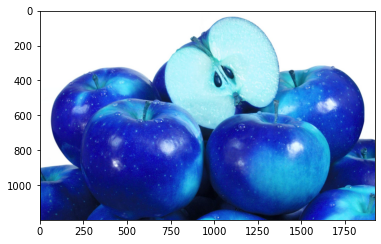

In [177]:
plt.imshow(test_img)

In [153]:
test_img.shape

(1000, 1000, 3)

In [181]:
test_img = cv2.resize(test_img,(256,256))

In [182]:
test_input = test_img.reshape((1,256,256,3))

In [183]:
model.predict(test_input)

1/1 [==============================] - 0s 49ms/step


array([[1., 0., 0.]], dtype=float32)

In [184]:
history = model.predict(test_input)

1/1 [==============================] - 0s 54ms/step


In [163]:
history[0]

0.0

In [185]:
import tensorflow as tf
import numpy as np
from PIL import Image

# # load your saved CNN model
# model = tf.keras.models.load_model('my_cnn_model.h5')

# # load the image as a PIL Image object
# img = Image.open('C:/Users/91942/Downloads/download (2).jfif')

# # preprocess the image
# img = img.resize((256, 256))  # resize the image to match the input size of the model
# img = np.array(img) / 255.0  # convert the image to a numpy array and normalize its pixel values

# # add a batch dimension to the input data
# img = np.expand_dims(img, axis=0)

# # use the model to make a prediction on the input data
# predictions = model.predict(img)

# get the index of the class with the highest probability
class_idx = np.argmax(history[0])

# get the percentage of each class prediction
class_probabilities = tf.nn.softmax(history[0])
percentage = 100 * np.round(class_probabilities[class_idx].numpy(), 2)

# print the predicted class and its percentage
print(f"The predicted class is {class_idx} with a percentage of {percentage}%")


The predicted class is 0 with a percentage of 57.999998331069946%
